# GRACE data
GRACE: https://grace.jpl.nasa.gov   
Data: https://podaac.jpl.nasa.gov/dataset/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06_V2

In [67]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [68]:
filename="https://podaac-opendap.jpl.nasa.gov/opendap/allData/tellus/L3/mascon/RL06/JPL/v02/CRI/netcdf/GRCTellus.JPL.200204_202101.GLO.RL06M.MSCNv02CRI.nc"

In [69]:
with xr.open_dataset(filename) as ds:
    print(ds)
    lwe=ds.lwe_thickness

<xarray.Dataset>
Dimensions:        (bounds: 2, lat: 360, lon: 720, time: 193)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time           (time) datetime64[ns] 2002-04-17T12:00:00 ... 2021-01-16T1...
Dimensions without coordinates: bounds
Data variables:
    lat_bounds     (lat, bounds) float64 ...
    lon_bounds     (lon, bounds) float64 ...
    time_bounds    (time, bounds) datetime64[ns] ...
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
Attributes:
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G.

In [70]:
# Calculate annual average
avg_yr=lwe.groupby('time.year').mean(dim='time')

/Users/jungeunl/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


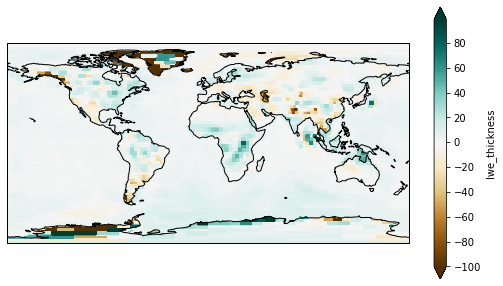

In [71]:
# Calculate the difference between the last and first years
diff=avg_yr.isel(year=-1)-avg_yr.isel(year=0)

lev1=np.arange(-100,110,10)
cmap1=plt.cm.BrBG
proj = ccrs.PlateCarree()
fig1 = plt.figure(figsize=(9,5))
ax1 = plt.axes(projection=ccrs.PlateCarree())
diff.plot.contourf(ax=ax1, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1)
ax1.coastlines()

/Users/jungeunl/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


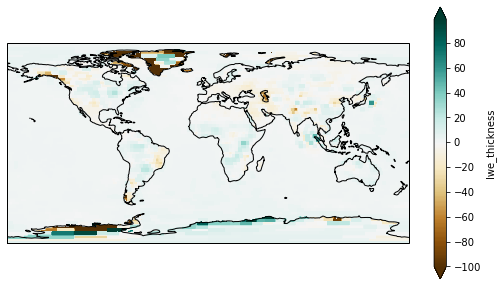

In [72]:
# Calculate average of the early 8 years and later 9 years.
early=avg_yr.loc["2003":"2010"].mean(dim='year')
late=avg_yr.loc["2011":"2020"].mean(dim='year')

# Make a contour plot for the difference
fig2 = plt.figure(figsize=(9,5))
ax2 = plt.axes(projection=ccrs.PlateCarree())
(late-early).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),
                           levels=lev1, cmap=cmap1)
ax2.coastlines()

Over Antarctica   
Cartopy map projection gallary:   
https://scitools.org.uk/cartopy/docs/latest/gallery/index.html


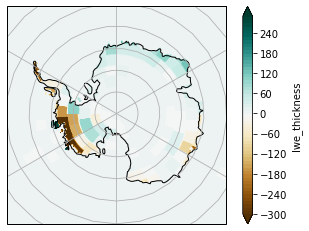

In [75]:
### fig3 = plt.figure(figsize=(5,5))
lev3=np.arange(-300,300,10)
ax3 = plt.axes(projection=ccrs.SouthPolarStereo())
(late-early).plot.contourf(ax=ax3, transform=ccrs.PlateCarree(),
                           levels=lev3, cmap=cmap1)
ax3.coastlines()
ax3.gridlines()
ax3.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

### Exercise
Choose a location that you'd like to see the difference and make a plot.